In [14]:
#cifar10에서 데이터를 로드
from keras.datasets import cifar10 
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import optimizers  
from keras.callbacks import EarlyStopping 
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np

In [15]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32
(50000, 32, 32, 3) uint8
(50000, 1) uint8


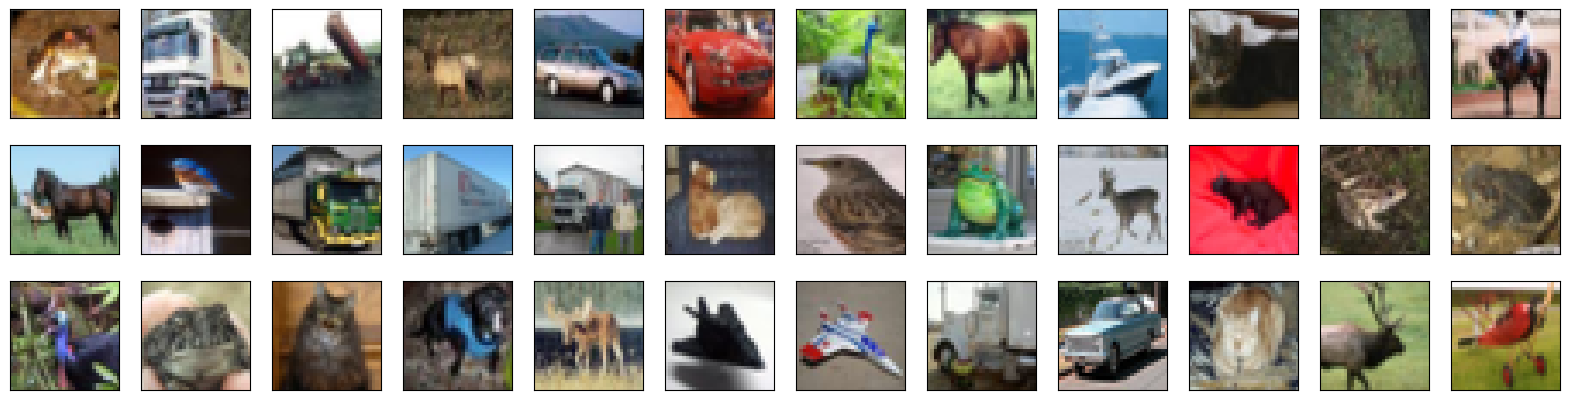

In [16]:
fig = plt.figure(figsize=(20,5))

for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i])

In [17]:
X_train = X_train/255.0
X_test = X_test /255.0

In [18]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
print(Y_train.shape)
print(Y_test.shape)

(50000, 10)
(10000, 10)


In [19]:
input_shape = (32, 32, 3)     # 행, 열, 채널
from keras.layers import BatchNormalization
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), padding='same',
         input_shape = input_shape, activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (5, 5), padding='same', activation='relu', kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                      

In [20]:
# 모델 컴파일 하기
model_checkpoint = ModelCheckpoint(filepath =  "./model/cyfar_model.h5", monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor = 'val_loss', min_delta = 0, patience = 3)

# 모델 학습과정 설정하기
model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.Adam(0.001), metrics=['accuracy'])

In [21]:
# fit() 메서드로 모델 훈련 시키기
hist = model.fit(
    X_train, Y_train,
    epochs = 50, batch_size = 128,
    validation_data=(X_test, Y_test),
    callbacks = [model_checkpoint, early_stopping]
    )

Epoch 1/50
386/391 [============================>.] - ETA: 0s - loss: 1.6441 - accuracy: 0.4481
Epoch 1: val_loss improved from inf to 1.38746, saving model to ./model/cyfar_model.h5
391/391 [==============================] - 5s 12ms/step - loss: 1.6408 - accuracy: 0.4487 - val_loss: 1.3875 - val_accuracy: 0.5138
Epoch 2/50
390/391 [============================>.] - ETA: 0s - loss: 1.2011 - accuracy: 0.5763
Epoch 2: val_loss improved from 1.38746 to 1.05193, saving model to ./model/cyfar_model.h5
391/391 [==============================] - 4s 11ms/step - loss: 1.2009 - accuracy: 0.5763 - val_loss: 1.0519 - val_accuracy: 0.6274
Epoch 3/50
388/391 [============================>.] - ETA: 0s - loss: 1.0475 - accuracy: 0.6291
Epoch 3: val_loss improved from 1.05193 to 1.04121, saving model to ./model/cyfar_model.h5
391/391 [==============================] - 4s 10ms/step - loss: 1.0482 - accuracy: 0.6289 - val_loss: 1.0412 - val_accuracy: 0.6397
Epoch 4/50
389/391 [===========================

In [22]:
# 테스트 데이터로 정확도 측정하기
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('test_acc: ', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.7852 - accuracy: 0.7383
test_acc:  0.7383000254631042


In [23]:
predit = model.predict(X_test)
#for i in range(0,len(predit)) :
#    print("예측값 : ", predit[i], "\t실제값 : ", test_Y[i])
print(predit[0:5])
print(Y_test[0 :5])

313/313 [==============================] - 1s 2ms/step
[[8.92124623e-02 1.19875809e-02 2.24971566e-02 4.05910015e-01
  1.54970633e-02 3.28178912e-01 1.00657694e-01 1.40471291e-02
  6.24920987e-03 5.76276612e-03]
 [2.73062754e-02 1.72753409e-01 1.86540703e-08 3.37831674e-09
  3.01435743e-09 2.73082751e-10 3.27775096e-09 1.46652954e-10
  7.99405634e-01 5.34594234e-04]
 [5.14212310e-01 4.90989573e-02 4.72664041e-03 1.83646940e-03
  6.02067541e-03 2.39692468e-04 1.87682497e-04 1.06453872e-03
  3.83258909e-01 3.93540896e-02]
 [5.82606733e-01 1.35345629e-03 8.08492885e-04 1.01470796e-04
  2.37139035e-03 1.67445967e-06 1.08116399e-06 3.17724954e-07
  4.12400037e-01 3.55435215e-04]
 [6.82479185e-06 1.33849840e-04 2.27414332e-02 2.40117788e-01
  3.73490363e-01 3.65448035e-02 3.26355547e-01 4.64741577e-04
  1.15688068e-04 2.88963201e-05]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0

313/313 [==============================] - 1s 2ms/step


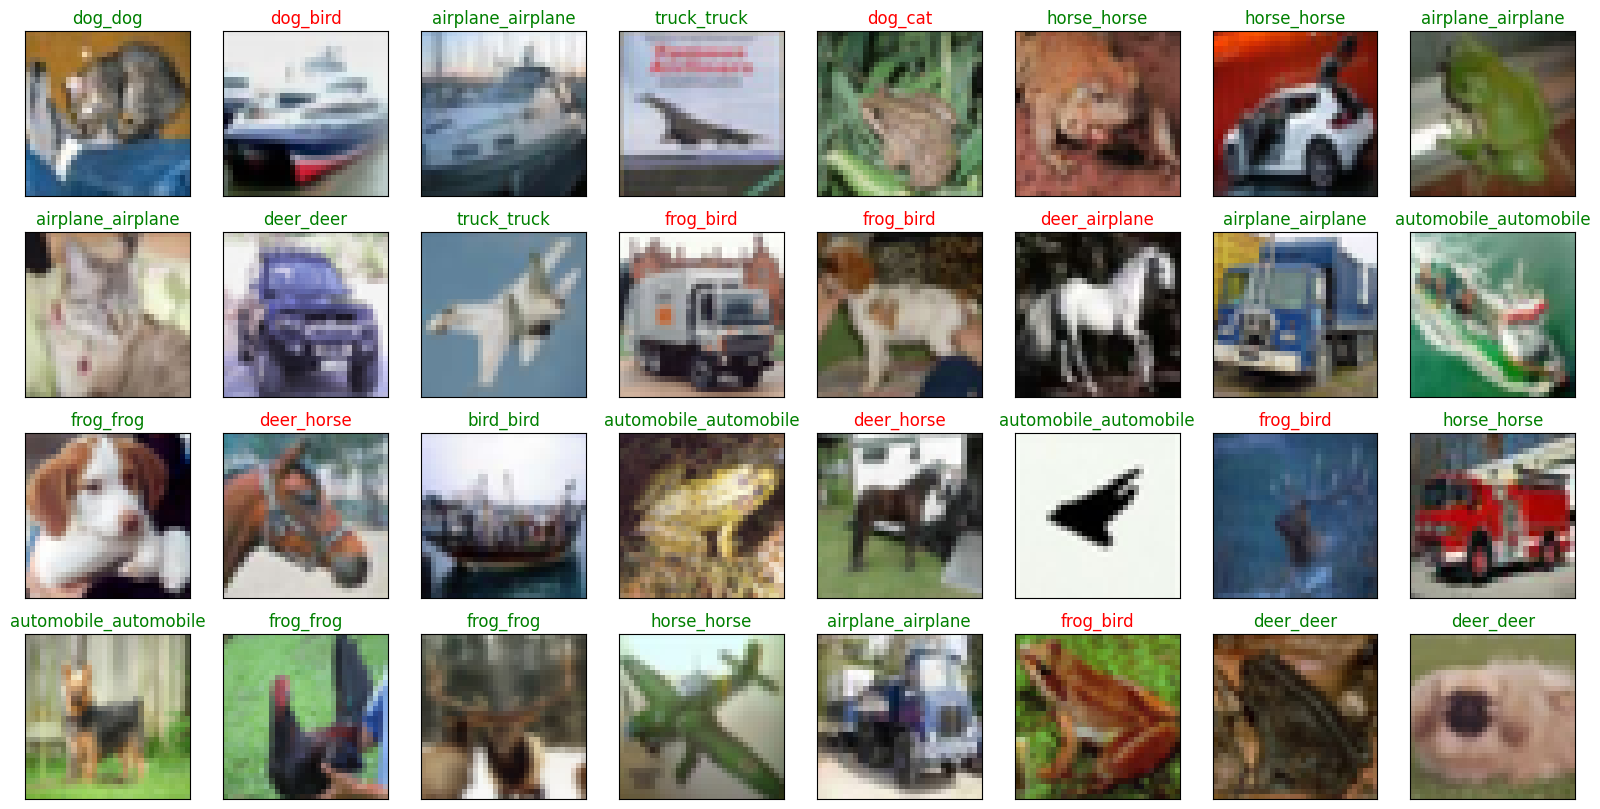

In [24]:
pred = model.predict(X_test)
label = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

fig = plt.figure(figsize=(20,10))

for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32)):
    ax = fig.add_subplot(4,8, i+1 , xticks=[], yticks=[])
    ax.imshow(X_test[i])
    
    pred_idx = np.argmax(pred[idx])
    true_idx = np.argmax(Y_test[idx])
    
    ax.set_title("{}_{}".format(label[pred_idx], label[true_idx]), color='green' if pred_idx == true_idx else 'red')